## Importing Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
data.shape

(729322, 11)

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Data Transformation

In [6]:
data['passenger_count'].unique()

array([1, 2, 6, 3, 4, 5, 0, 7, 9], dtype=int64)

In [7]:
data= data.loc[data['passenger_count']!=0]
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


In [8]:
def CalcDistance(lat1,lon1,lat2,lon2):

        REarth = 6371
        lat = np.abs(np.array(lat1)-np.array(lat2))*np.pi/180
        lon = np.abs(np.array(lon1)-np.array(lon2))*np.pi/180
        lat1 = np.array(lat1)*np.pi/180
        lat2 = np.array(lat2)*np.pi/180
        a = np.sin(lat/2)*np.sin(lat/2)+np.cos(lat1)*np.cos(lat2)*np.sin(lon/2)*np.sin(lon/2)
        d = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
        d = REarth*d
        return d

In [9]:
data["distance"] = (
    CalcDistance(
        data.loc[:, "pickup_latitude"], data.loc[:, "pickup_longitude"], 
        data.loc[:, "dropoff_latitude"], data.loc[:, "dropoff_longitude"]
    )
)

In [10]:
data["pickup_datetime"]=pd.to_datetime(data["pickup_datetime"])
data['day_of_week'] = data['pickup_datetime'].dt.day_name()
data['hour_of_the_day']=data['pickup_datetime'].dt.hour
data['month']=data['pickup_datetime'].dt.month
data['day_of_week']=data['day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
data['store_and_fwd_flag']=data['store_and_fwd_flag'].map({'N':0,'Y':1})
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,day_of_week,hour_of_the_day,month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,1.199073,1,16,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4.129111,5,23,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,7.250753,7,17,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2.361097,2,9,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,4.328534,3,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,0,296,1.120223,6,13,5
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,0,315,0.728705,1,0,2
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,0,673,2.298776,5,18,4
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,0,447,0.846316,7,9,6


In [11]:
data.drop(['id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],inplace=True,axis=1)

In [12]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,day_of_week,hour_of_the_day,month
0,2,1,0,400,1.199073,1,16,2
1,1,2,0,1100,4.129111,5,23,3
2,2,2,0,1635,7.250753,7,17,2
3,2,6,0,1141,2.361097,2,9,1
4,1,1,0,848,4.328534,3,6,2


In [13]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,day_of_week,hour_of_the_day,month
0,2,1,0,400,1.199073,1,16,2
1,1,2,0,1100,4.129111,5,23,3
2,2,2,0,1635,7.250753,7,17,2
3,2,6,0,1141,2.361097,2,9,1
4,1,1,0,848,4.328534,3,6,2


### Shuffling and Creating Train and Test Set

In [14]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [15]:
train.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,day_of_week,hour_of_the_day,month
502861,1,2,0,1468,7.399829,2,10,1
507634,2,3,0,1140,9.989149,6,1,5
336848,2,1,0,552,1.446106,5,16,1
306906,1,1,0,569,2.494339,4,23,6
320807,2,1,0,1005,2.674181,5,22,1


In [16]:
test.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,day_of_week,hour_of_the_day,month
546967,2,1,0,1055,5.227630,5,0,5
686906,1,1,0,236,0.508608,2,10,1
94795,2,1,0,379,1.485002,6,11,4
147753,1,1,0,442,2.627990,1,20,5
600274,2,1,0,587,1.309411,3,8,3


# Evaluation Metrics

In [17]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

## MAE

In [18]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
simple_mean_error

666.7656293996753

## MSE

In [19]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(test['trip_duration'] , test['simple_mean'])
MSE

14334416.030405317

## RMSE

In [20]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error
  
RMSE = math.sqrt(mean_squared_error(test['trip_duration'] , test['simple_mean']))
RMSE

3786.081883742785

## RMSLE

In [21]:
#calculating mean squared log error
from sklearn.metrics import mean_squared_log_error

RMSLE = math.sqrt(mean_squared_log_error(test['trip_duration'] , test['simple_mean']))
RMSLE

0.8980127747102784

## R2

In [22]:
#calculating r2 score
from sklearn.metrics import r2_score

R2 = r2_score(test['trip_duration'] , test['simple_mean'])
R2

-0.0001744523970430567

## Adjusted R2

In [23]:
#calculating adjusted r2 score
from sklearn.metrics import r2_score

R2 = r2_score(test['trip_duration'] , test['simple_mean'])
n = 729322
p = 10
Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1)
Adj_R2

-0.00018816636066620873

# Benchmark Model

## Mean trip_duration with respect to vendor_id

In [24]:
ven_type = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
ven_type

,trip_duration
vendor_id,
1,837.352785
2,1050.227572


In [25]:
# initializing new column to zero
test['ven_type_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['ven_type_mean'][test['vendor_id'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()

In [26]:
#calculating mean absolute error
ven_type_error = MAE(test['trip_duration'] , test['ven_type_mean'] )
ven_type_error

1001.2961587890904

## Mean trip_duration with respect to passenger_count

In [27]:
trip_passenger = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
trip_passenger

,trip_duration
passenger_count,
1,920.091675
2,995.387884
3,1029.905892
4,1009.145486
5,1081.138060
6,1088.381408
7,19.000000
9,560.000000


In [28]:
# initializing new column to zero
test['trip_passenger_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['trip_passenger_mean'][test['passenger_count'] == i] = train['trip_duration'][train['passenger_count'] == i].mean()

In [29]:
#calculating mean absolute error
trip_passenger_error = MAE(test['trip_duration'] , test['trip_passenger_mean'] )
trip_passenger_error

667.0719488113779

## Mean trip_duration with respect to both vendor_id and passenger_count

In [30]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id','passenger_count'], aggfunc = np.mean)
combo

trip_duration
vendor_id passenger_count               
1         1                   815.001825
          2                   930.002814
          3                   933.059008
          4                   966.292450
          5                   927.557471
          6                  1101.842857
2         1                  1039.651473
          2                  1046.321183
          3                  1089.907740
          4                  1040.708354
          5                  1081.840133
          6                  1088.341400
          7                    19.000000
          9                   560.000000

In [31]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'vendor_id'
s1 = 'passenger_count'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [32]:
#calculating mean absolute error
super_mean_error = MAE(test['trip_duration'] , test['Super_mean'] )
super_mean_error

1001.2961587890904

# K-Nearest neighbours’ model

## Segregating Variables

In [33]:
x = data.drop(['trip_duration'], axis = 1)
y = data['trip_duration']

In [34]:
x.shape

(729289, 7)

In [35]:
y.shape

(729289,)

### Scaling the data (Using MinMax Scaler)

In [36]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
x = pd.DataFrame(x_scaled)

In [38]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [39]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [40]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     31168603.628872063


## Elbow curve 

In [41]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [42]:
k = range(1,20,2)

In [44]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

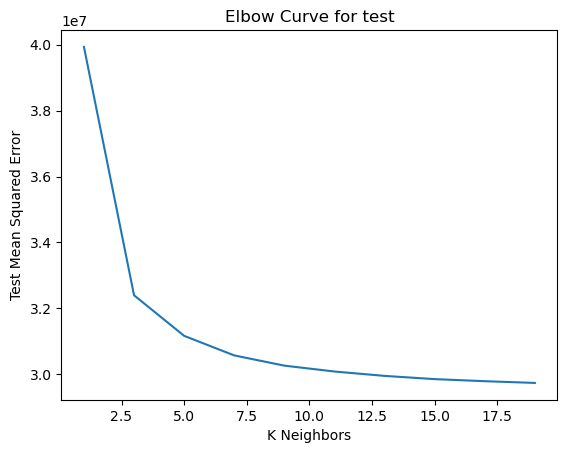

In [45]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [46]:
# Creating instance of KNN
reg = KNN(n_neighbors = 20)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     29722197.173021976


# Linear Regression

In [47]:
X = data.drop(['trip_duration'], axis = 1)
y = data['trip_duration']

In [48]:
from sklearn import preprocessing
print("Scale all the columns successfully done") 
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled)
y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled)

Scale all the columns successfully done


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=1)

In [53]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for idcoff, columnname in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(columnname, regression_model.coef_[0][idcoff]))

The coefficient for 0 is 0.026283717237460962
The coefficient for 1 is 0.005587185767254906
The coefficient for 2 is 0.0014327200012341636
The coefficient for 3 is 0.12089034423300798
The coefficient for 4 is -0.0036925778214617275
The coefficient for 5 is 0.004509531409240273
The coefficient for 6 is 0.007179132676283227


In [54]:
y_pred = regression_model.predict(X_test) 

In [55]:
#Evaluate the regressor on the raw data
print('RMSE score is : {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('Variance score is : %.2f' % regression_model.score(X_test, y_test))
print("\n")


RMSE score is : 0.7501189820126845
Variance score is : 0.03




In [56]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0013323448300293934


In [57]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.014240563864903466
0.03063200785730924


In [58]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [59]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.0262837   0.00558719  0.00143272  0.12089028 -0.00369258  0.00450953
   0.00717913]]


In [60]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.          0.          0.02547631 -0.          0.
  0.        ]


In [61]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.014240563864899358
0.030632003995532897


In [62]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.005065242902982825
0.00979789320503699


# Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train,y_train)


RandomForestRegressor()

In [74]:
y_pred = reg.predict(X_test)

In [75]:
print('RMSE score is : {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('Variance score is : %.2f' % reg.score(X_test, y_test))

RMSE score is : 0.8269523904538725
Variance score is : -0.18


## Comparing Scores of above models

In [79]:
rf_train_score = rf.score(X_train, y_train)
rf_train_score

0.8261603847877287

In [77]:
LR_train_score = regression_model.score(X_train, y_train)
LR_train_score

0.014240563864903466

In [78]:
knn_train_score = reg.score(X_train, y_train)
knn_train_score

0.8245251981101969

In [80]:
rf_test_score = rf.score(X_test, y_test)
rf_test_score

-0.18858629341216315

In [81]:
LR_test_score = regression_model.score(X_test, y_test)
LR_test_score

0.03063200785730924

In [82]:
knn_test_score = reg.score(X_test, y_test)
knn_test_score

-0.1781195918601719

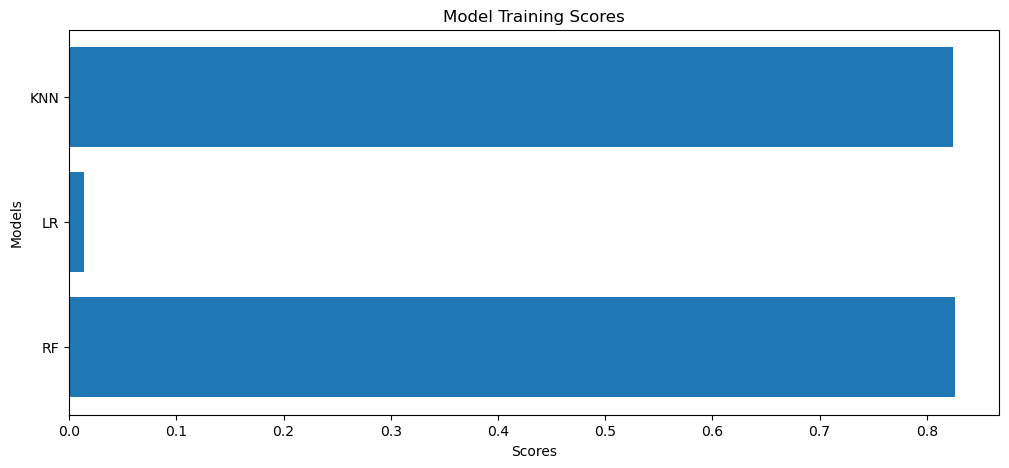

In [89]:
fig = plt.figure(figsize = (12, 5))
 
plt.barh(['RF', 'LR', 'KNN'], [rf_train_score, LR_train_score, knn_train_score ])
 
plt.xlabel("Scores")
plt.ylabel("Models")
plt.title("Model Training Scores")
plt.show()

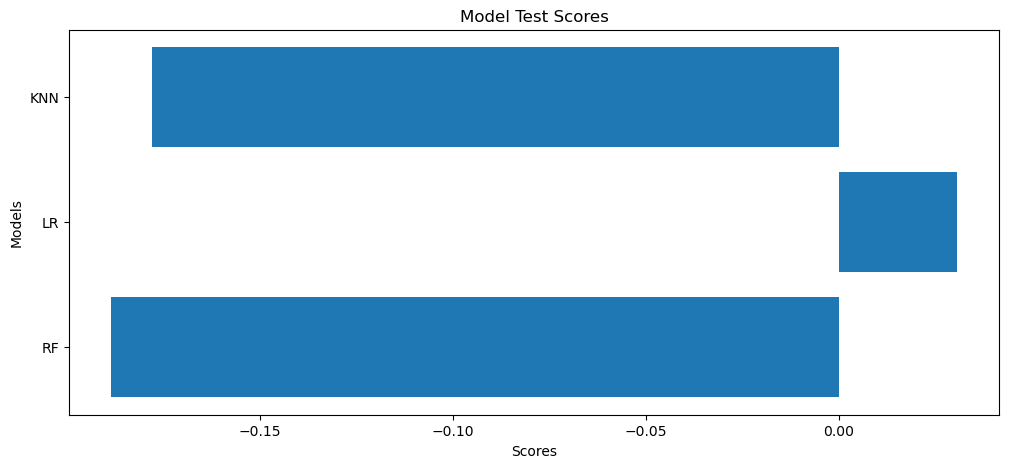

In [90]:
fig = plt.figure(figsize = (12, 5))
 
plt.barh(['RF', 'LR', 'KNN'], [rf_test_score, LR_test_score, knn_test_score ])
 
plt.xlabel("Scores")
plt.ylabel("Models")
plt.title("Model Test Scores")
plt.show()